In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [8]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data.head().T

,0,1,2,3,4
id,9046,51676,31112,60182,1665
gender,Male,Female,Male,Female,Female
age,67.0,61.0,80.0,49.0,79.0
hypertension,0,0,0,0,1
heart_disease,1,0,1,0,0
ever_married,Yes,Yes,Yes,Yes,Yes
work_type,Private,Self-employed,Private,Private,Self-employed
Residence_type,Urban,Rural,Rural,Urban,Rural
avg_glucose_level,228.69,202.21,105.92,171.23,174.12
bmi,36.6,NaN,32.5,34.4,24.0


In [9]:
print(f"Data shape: {data.shape}")

Data shape: (5110, 12)


In [10]:
# missing values
missing_values = data.isnull().sum()
missing_values

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
#dropping missing value rows
train_data = data.dropna(axis=0, how="any")
print('Train Data Shape: {}'.format(train_data.shape))

Train Data Shape: (4909, 12)


In [12]:
train_data['stroke'].unique()

array([1, 0], dtype=int64)

In [13]:
train_data['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [14]:
train_data['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [15]:
train_data['stroke'].value_counts()

0    4700
1     209
Name: stroke, dtype: int64

Text(0.5, 1.0, 'Number of patients affected by stroke')

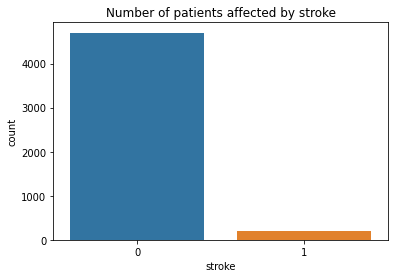

In [70]:
sns.countplot(x=train_data['stroke'])

plt.title('Number of patients affected by stroke',fontsize = 12)

In [16]:
train_data['gender'].value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

In [17]:
train_data.groupby(['gender'])['stroke'].value_counts()

gender  stroke
Female  0         2777
        1          120
Male    0         1922
        1           89
Other   0            1
Name: stroke, dtype: int64

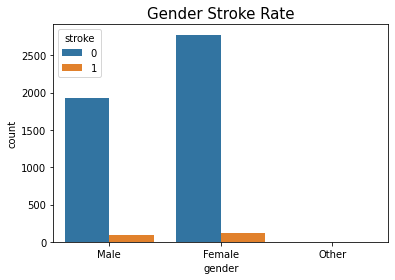

In [18]:
sns.countplot(x=train_data['gender'], hue = train_data['stroke'])
plt.title('Gender Stroke Rate',fontsize = 15)
plt.show()

In [19]:
drop_unknown = train_data[train_data['smoking_status'] == "Unknown"].index
train_data.drop(drop_unknown, inplace = True, axis = 0)

c:\users\rahul\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [20]:
# rows and columns after dropped the unknown values 
# from smoking status column

print(f"Data shape after dropped Unknown: {train_data.shape}")

Data shape after dropped Unknown: (3426, 12)


In [21]:
train_data['smoking_status'].value_counts()

never smoked       1852
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64

In [22]:
train_data.groupby(['smoking_status'])['stroke'].value_counts()

smoking_status   stroke
formerly smoked  0          780
                 1           57
never smoked     0         1768
                 1           84
smokes           0          698
                 1           39
Name: stroke, dtype: int64

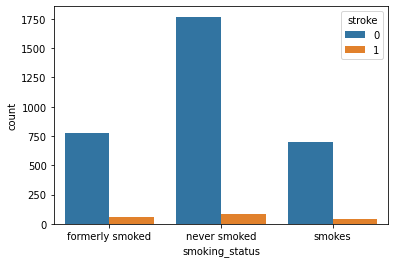

In [23]:
sns.countplot(x = train_data['smoking_status'], hue = train_data['stroke'])
plt.show()

In [24]:
# object datas and numeric data seperation

str_data = train_data.select_dtypes(include=['object'])

int_data = train_data.select_dtypes(include = ['integer','float'])

In [26]:
label = LabelEncoder()
features = str_data.apply(label.fit_transform)
features = features.join(int_data)
features.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,1,1,2,1,0,9046,67.0,0,1,228.69,36.6,1
2,1,1,2,0,1,31112,80.0,0,1,105.92,32.5,1
3,0,1,2,1,2,60182,49.0,0,0,171.23,34.4,1
4,0,1,3,0,1,1665,79.0,1,0,174.12,24.0,1
5,1,1,2,1,0,56669,81.0,0,0,186.21,29.0,1


In [27]:
# dropping 'id' and 'stroke' column to make x_train model 

xtrain = features.drop(['stroke','id'], axis = 1)
xtrain.head()

,gender,ever_married,work_type,Residence_type,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi
0,1,1,2,1,0,67.0,0,1,228.69,36.6
2,1,1,2,0,1,80.0,0,1,105.92,32.5
3,0,1,2,1,2,49.0,0,0,171.23,34.4
4,0,1,3,0,1,79.0,1,0,174.12,24.0
5,1,1,2,1,0,81.0,0,0,186.21,29.0


In [28]:
# taking last column for y_train model

ytrain = features['stroke']
ytrain.head()

0    1
2    1
3    1
4    1
5    1
Name: stroke, dtype: int64

In [29]:
# Making training and testing models

from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(xtrain,ytrain)

In [30]:
# x_train model as a data frame
x_train.head().T

,3011,2106,1921,4845,3099
gender,0.00,0.00,1.00,1.00,0.00
ever_married,0.00,1.00,1.00,1.00,0.00
work_type,2.00,2.00,2.00,2.00,2.00
Residence_type,0.00,1.00,0.00,0.00,0.00
smoking_status,0.00,0.00,2.00,1.00,2.00
age,60.00,27.00,44.00,55.00,29.00
hypertension,0.00,0.00,0.00,0.00,0.00
heart_disease,0.00,0.00,0.00,0.00,0.00
avg_glucose_level,91.82,98.71,95.46,86.58,79.27
bmi,28.30,26.10,31.40,34.20,29.00


In [31]:
# GaussianNB model making

model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [32]:
test_score = model.score(x_test, y_test)
print("NBtest_score:", test_score)

NBtest_score: 0.8844807467911319


In [33]:
train_score = model.score(x_train, y_train)
print("NBtrain_score:",train_score)

NBtrain_score: 0.8692098092643051


In [34]:
# Desicion tree model making

desicion_tree_mod = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8)
desicion_tree_mod.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [35]:
desicion_tree_test_score = desicion_tree_mod.score(x_test, y_test)
print("Desicion Tree test_score:", desicion_tree_test_score)

Desicion Tree test_score: 0.9638273045507585


In [36]:
desicion_tree_train_score = desicion_tree_mod.score(x_train, y_train)
print("Desicion tree train score: ", desicion_tree_train_score)

Desicion tree train score:  0.958349552355002


In [37]:
y_pred = desicion_tree_mod.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [92]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [93]:
y_pred_svc = svc.predict(x_test)
y_pred_svc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [96]:
svc_test_score = svc.score(x_test, y_test)
print("svc test score: ",svc_test_score)

svc test score:  0.9509918319719953


In [97]:
svc_train_score = svc.score(x_train, y_train)
print("svc train score: ", svc_train_score)

svc train score:  0.9462826002335539


In [38]:
from sklearn.metrics import accuracy_score
accuracy_decision_tree = accuracy_score(y_test, y_pred)

In [39]:
print("Decision tree Accuracy: " + str(accuracy_decision_tree * 100))

Decision tree Accuracy: 96.38273045507584


In [40]:
sc = MinMaxScaler(feature_range=(0, 1))
dataset_scaled = sc.fit_transform(xtrain.values)
y = ytrain.values

In [41]:
y_pred = desicion_tree_mod.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [104]:
import joblib as jb
jb.dump(desicion_tree_mod, 'stroke.joblib')
model = jb.load('stroke.joblib')

In [44]:
print(model.predict(sc.transform(np.array([[1.0, 0, 2.0, 1.0, 0, 25.0, 0, 0, 79.20, 38.5]]))))

[0]
